In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../resource/result/data_with_metrics.csv')
print(df.shape)
df.head()

(89201, 5)


,commit_id,changed_src_files,categories,complexity,lloc
0,fb4272aab89ee73645392850c441b5df8b5f4c49,platforms/spring-boot/components-starter/camel...,1,176,540
1,fb4272aab89ee73645392850c441b5df8b5f4c49,platforms/spring-boot/components-starter/camel...,1,170,522
2,20db898ea83bf8d2b0640abf5e04ed5e347f1c05,components/camel-jms/src/main/java/org/apache/...,2,148,478
3,20db898ea83bf8d2b0640abf5e04ed5e347f1c05,platforms/spring-boot/components-starter/camel...,1,168,516
4,409529fd3f60d2978d86927b062f551aa55066d7,core/camel-main/src/main/java/org/apache/camel...,4,200,721


In [44]:
processed_df = pd.read_csv('../resource/result/data_with_metrics_threthold7.csv')
df2 = df[df["commit_id"].isin(processed_df["commit_id"])]
print(df2.shape)
df2.head()

(38569, 5)


,commit_id,changed_src_files,categories,complexity,lloc
0,fb4272aab89ee73645392850c441b5df8b5f4c49,platforms/spring-boot/components-starter/camel...,1,176,540
1,fb4272aab89ee73645392850c441b5df8b5f4c49,platforms/spring-boot/components-starter/camel...,1,170,522
2,20db898ea83bf8d2b0640abf5e04ed5e347f1c05,components/camel-jms/src/main/java/org/apache/...,2,148,478
3,20db898ea83bf8d2b0640abf5e04ed5e347f1c05,platforms/spring-boot/components-starter/camel...,1,168,516
4,409529fd3f60d2978d86927b062f551aa55066d7,core/camel-main/src/main/java/org/apache/camel...,4,200,721


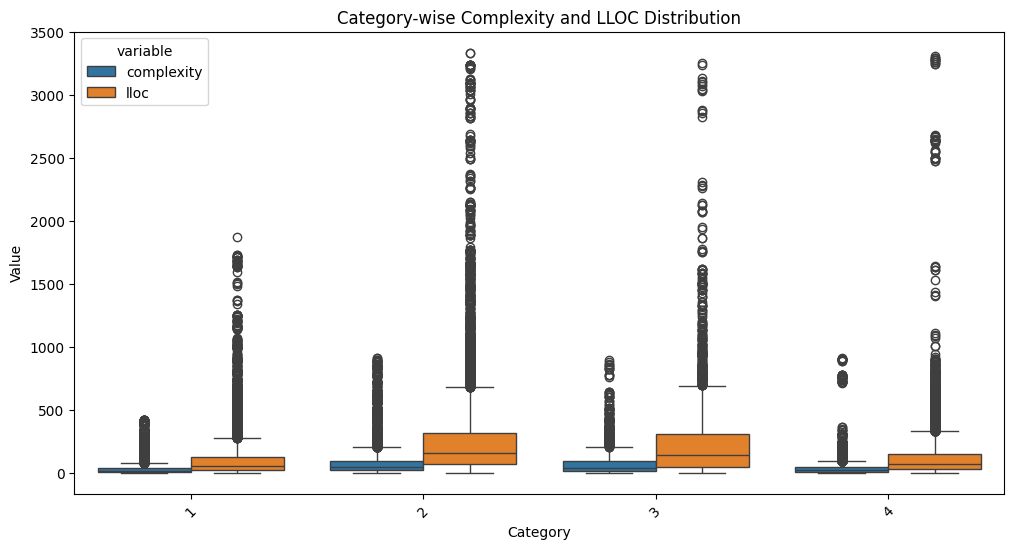

In [45]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='categories', y='value', hue='variable', data=pd.melt(df2[['categories', 'complexity', 'lloc']], 
                                                             id_vars=['categories'], 
                                                             value_vars=['complexity', 'lloc'], 
                                                             var_name='variable', value_name='value'))
plt.title('Category-wise Complexity and LLOC Distribution')
plt.xlabel('Category')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()


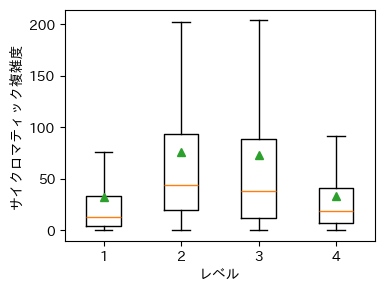

In [51]:
import matplotlib.pyplot as plt
import japanize_matplotlib  # 日本語フォントのサポートを簡単に設定できるライブラリ
import numpy as np

# データフレーム（df）の準備
categories = sorted(df2['categories'].unique())
category_indices = {category: idx for idx, category in enumerate(categories)}
category_data = {category: df2[df2['categories'] == category]['complexity'].values for category in categories}

# 箱ひげ図の作成
fig, ax = plt.subplots(figsize=(4, 3))

# データをプロット
ax.boxplot([category_data[category] for category in categories], vert=True, patch_artist=False, showmeans=True, sym="")

# タイトル、ラベル、X軸のラベルを設定
# ax.set_title('Category-wise Complexity Distribution')
ax.set_xlabel('レベル')
ax.set_ylabel('サイクロマティック複雑度')
ax.set_xticklabels(categories)

# グラフの表示
plt.show()


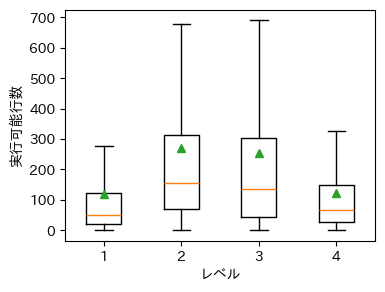

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# データフレーム（df）の準備
categories = sorted(df['categories'].unique())
category_indices = {category: idx for idx, category in enumerate(categories)}
category_data = {category: df2[df2['categories'] == category]['lloc'].values for category in categories}

# 箱ひげ図の作成
fig, ax = plt.subplots(figsize=(4, 3))

# データをプロット
ax.boxplot([category_data[category] for category in categories], vert=True, patch_artist=False, showmeans=True, sym="")

# タイトル、ラベル、X軸のラベルを設定
# ax.set_title('Category-wise LLOC Distribution')
ax.set_xlabel('レベル')
ax.set_ylabel('実行可能行数')
ax.set_xticklabels(categories)


# グラフの表示
plt.show()
